#     COURSE: Linear algebra: theory and implementation
##    SECTION: Projections and orthogonalization

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Projections in R^2
---


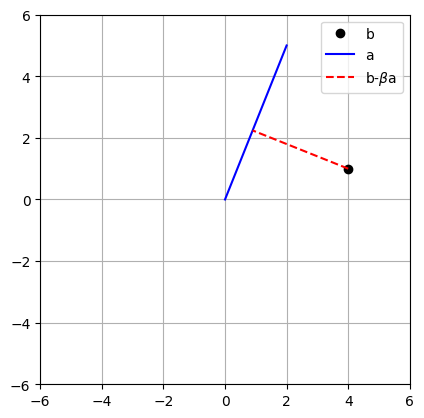

In [11]:

# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
beta = (a.T@b) / (a.T@a)

# draw!
plt.plot(b[0],b[1],'ko',label='b')
plt.plot([0, a[0]],[0, a[1]],'b',label='a')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]],'r--',label=r'b-$\beta$a')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()


---
# VIDEO: Projections in R^N
---


In [12]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T@A) @ (A.T@b)

# python solution (better method) to avoid using inv()
x2 = np.linalg.solve(A.T@A,A.T@b)

# show that the results are the same
print(np.round(x1.T,3))
print(np.round(x2.T,3))

[[-0.105  0.461  0.12  -0.285  0.567 -0.401 -0.126  0.259  0.051 -0.181]]
[[-0.105  0.461  0.12  -0.285  0.567 -0.401 -0.126  0.259  0.051 -0.181]]


In [19]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(b.T)
print(Ax.T)

[[ 1.92578548 -0.0274336  -1.29666496]]
[[ 1.85131951 -0.33181135 -1.32449764]]


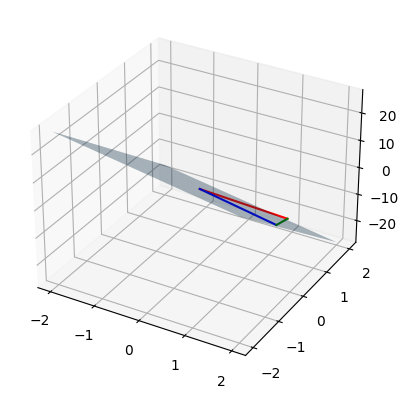

In [20]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
# ax = fig.gca(projection='3d')
ax = plt.subplot(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)

plt.show()

In [3]:
# Code Challenge: decompose vector to orthogonal components
import numpy as np

# vector w, to be decomposed
w = np.array([2, 3])

# vector v, the reference
v = np.array([4, 0])

# compute w-parallel-to-v
beta = np.dot(v, w) / np.dot(v, v)  # compute the scale
w_par_v = beta * v

# compute w-orthogonal-to-v
w_perp_v = w - w_par_v

# confirm results algebraically (sum to w, orthogonal components)
print( (w_par_v + w_perp_v) - w )
print( np.dot(w_par_v, w_perp_v))

[0. 0.]
0.0


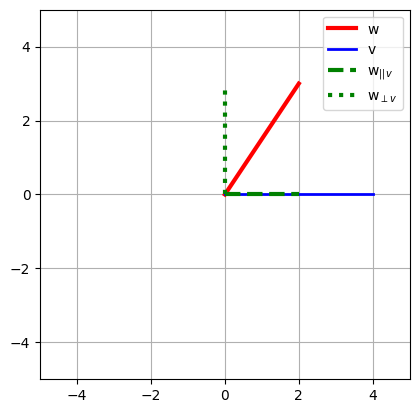

In [5]:
# plot all 4!
import matplotlib.pyplot as plt

plt.plot([0, w[0]], [0, w[1]], 'r', linewidth=3)
plt.plot([0, v[0]], [0, v[1]], 'b', linewidth=2)
plt.plot([0, w_par_v[0]], [0, w_par_v[1]], 'g--', linewidth=3)
plt.plot([0, w_perp_v[0]], [0, w_perp_v[1]], 'g:', linewidth=3)

plt.legend(['w', 'v', 'w$_{||v}$', 'w$_{\perp v}$'])  # latex coding
plt.axis('square')
plt.grid()
plt.axis([-5, 5, -5, 5])
plt.show()


---
# VIDEO: QR decomposition
---


In [4]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]
  
# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q), print(' ')

# "economy" QR decomposition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [6]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(np.round(R,4))
print('R from Q^TM: '),print(np.round(Q.T@M,4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


(None, None)

[]

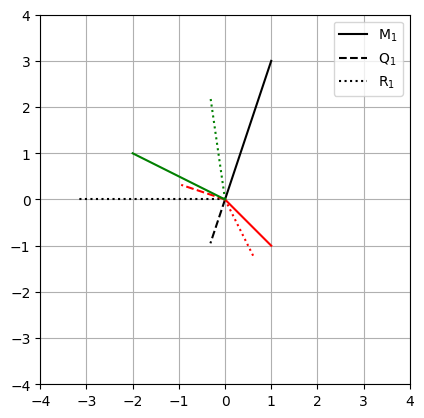

In [10]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()

In [15]:
# Code Challenge: Gram-Schmidt algorithm

# start with a square matrix, compute Q
# check Q'Q = I
# check against np.linalg.qr()

def gram_schmidt(m, n):
    A = np.random.randn(m, n)
    Q = np.zeros((m, n))

    for i in range(n):  # loop over columns
        Q[:, i] = A[:, i]
        a = A[:, i]

        # step 1: orthogonalize the ith column in Q,
        #         relative to previous columns in A
        for j in range(i):
            q = Q[:, j]
            Q[:, i] = Q[:, i] - np.dot(a, q) / np.dot(q, q) * q
        
        # step 2: normalize ith column of Q
        Q[:, i] = Q[:, i] / np.linalg.norm(Q[:, i])
    
    # check 1:
    print(np.round(Q.T@Q, 3))
    plt.imshow(Q.T@Q)
    plt.show()

    # check 2:
    Q2, R = np.linalg.qr(A, 'complete')
    print(np.round(Q, 3), '\n')
    print(np.round(Q2, 3))

[[ 1. -0. -0. -0.]
 [-0.  1.  0. -0.]
 [-0.  0.  1. -0.]
 [-0. -0. -0.  1.]]


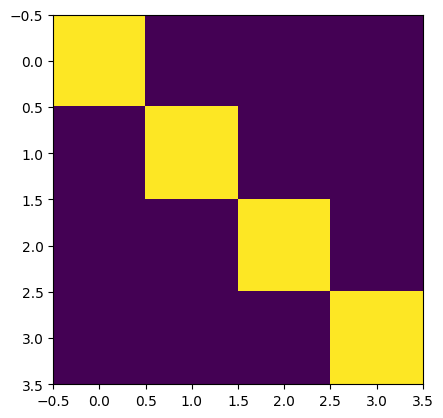

[[-0.242  0.279  0.207 -0.906]
 [ 0.202  0.899  0.265  0.283]
 [ 0.432 -0.336  0.837 -0.027]
 [ 0.845  0.036 -0.432 -0.313]] 

[[-0.242 -0.279 -0.207  0.906]
 [ 0.202 -0.899 -0.265 -0.283]
 [ 0.432  0.336 -0.837  0.027]
 [ 0.845 -0.036  0.432  0.313]]


In [16]:
gram_schmidt(4, 4)

[[ 1.    -0.    -0.     0.     0.445]
 [-0.     1.    -0.    -0.     0.77 ]
 [-0.    -0.     1.    -0.     0.404]
 [ 0.    -0.    -0.     1.    -0.213]
 [ 0.445  0.77   0.404 -0.213  1.   ]]


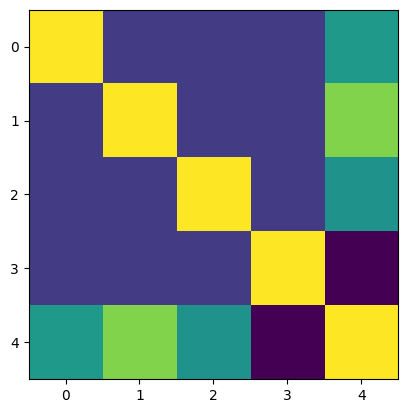

[[-0.465  0.18  -0.265 -0.825  0.   ]
 [ 0.409 -0.081 -0.908  0.043 -0.256]
 [ 0.02   0.972 -0.068  0.222  0.683]
 [-0.785 -0.124 -0.318  0.517 -0.683]] 

[[-0.465  0.18  -0.265 -0.825]
 [ 0.409 -0.081 -0.908  0.043]
 [ 0.02   0.972 -0.068  0.222]
 [-0.785 -0.124 -0.318  0.517]]


In [17]:
gram_schmidt(4, 5)

## Code Challenge: Inverse via QR

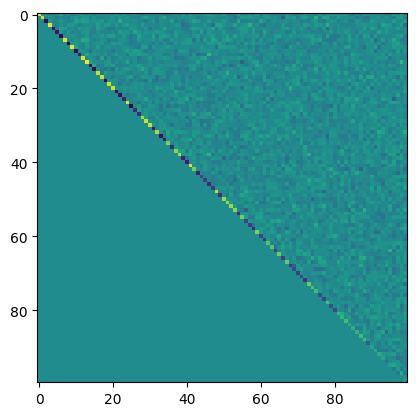

In [18]:
# Code challenge: Inverse via QR
x = 100
O = np.random.randn(x, x)

# explicit inverse
Oi = np.linalg.inv(O)

# inverse via QR
Q, R = np.linalg.qr(O)
plt.imshow(R)
plt.show()

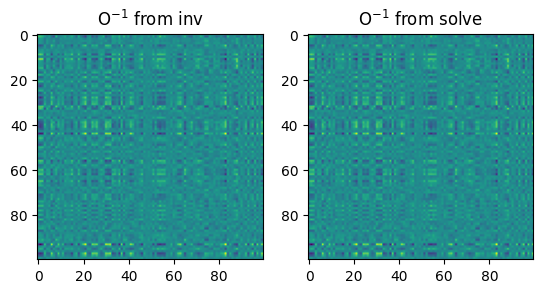

In [20]:
QiQR1 = np.linalg.inv(R)@Q.T
QiQR2 = np.linalg.solve(R, Q.T)  # better instead of directly using inv()

plt.subplot(1, 2, 1)
plt.imshow(QiQR1)
plt.title('O$^{-1}$ from inv')

plt.subplot(1, 2, 2)
plt.imshow(QiQR2)
plt.title('O$^{-1}$ from solve')

plt.show()

In [21]:
np.corrcoef((QiQR1.flatten(), QiQR2.flatten(), Oi.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Code Challenge: Prove and decomstrate the Sherman-Morrison inverse

In [32]:
# Sherman-Morrison Formula

m = 5
a = np.random.randn(m)
b = np.random.randn(m)

A  = np.eye(m) - np.outer(a, b)
Ai = np.eye(m) + np.outer(a, b) / (1-np.dot(a, b))
print(np.round(A@Ai, 3))

a = a/np.linalg.norm(a)
b = a

A  = np.eye(m) - np.outer(a, b)
Ai = np.eye(m) + np.outer(a, b) / (1-np.dot(a, b))
print(np.round(A@Ai, 3))  # can be nan if 1-np.dot(a, b) == 0

[[ 1.  0. -0.  0.  0.]
 [-0.  1.  0. -0.  0.]
 [ 0. -0.  1. -0.  0.]
 [-0. -0.  0.  1.  0.]
 [ 0. -0.  0. -0.  1.]]
[[ 1.178  0.051 -0.075  0.019  0.066]
 [ 0.051  1.151 -0.313  0.019  0.099]
 [-0.357 -0.282  1.418 -0.142 -0.184]
 [ 0.054  0.042 -0.142  1.019  0.037]
 [ 0.015  0.137 -0.079  0.011  0.98 ]]


In [33]:
# Code Challenge: A'A = R'R
# A'A = (QR)'QR = R'Q'QR = R'IR = R'R

m, n = 5, 10
A = np.random.randn(m, n)

Q, R = np.linalg.qr(A)

# test the claim
np.round(A.T@A - R.T@R, 4)

array([[ 0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.],
       [ 0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.],
       [-0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.],
       [ 0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.],
       [ 0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.],
       [ 0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.],
       [-0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.]])